In [1]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    x_train, x_test = train_test_split(df, test_size=0.2, random_state=2021)
    
    y_train = x_train[[id_name, target]]
    x_train = x_train.drop(columns=[target])

    
    y_test = x_test[[id_name, target]]
    x_test = x_test.drop(columns=[target])
    return x_train, x_test, y_train, y_test 
    
df = pd.read_csv("diabetes.csv")
x_train, x_test, y_train, y_test = exam_data_load(df, target='Outcome')

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 9), (154, 9), (614, 2), (154, 2))

In [2]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 147 to 116
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 48.0 KB


In [3]:
x_train.describe()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,386.978827,3.845277,120.705212,68.530945,20.982085,82.229642,31.948534,0.477471,33.319218
std,219.881344,3.388952,32.047977,19.761915,15.965031,116.525772,7.734385,0.339811,11.940953
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,196.500000,1.000000,99.000000,62.000000,0.000000,0.000000,27.400000,0.244250,24.000000
50%,388.000000,3.000000,117.000000,72.000000,23.000000,44.000000,32.250000,0.377000,29.000000
75%,575.750000,6.000000,140.000000,80.000000,33.000000,130.000000,36.600000,0.628500,41.000000
max,766.000000,17.000000,199.000000,114.000000,99.000000,846.000000,59.400000,2.420000,81.000000


In [4]:
x_train.head()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,147,2,106,64,35,119,30.5,1.400,34
344,344,8,95,72,0,0,36.8,0.485,57
390,390,1,100,66,29,196,32.0,0.444,42
150,150,1,136,74,50,204,37.4,0.399,24
132,132,3,170,64,37,225,34.5,0.356,30


> 다 연속형임 -> pairplot 및 boxplot

## EDA


In [5]:
x_train.duplicated().sum()

0

In [6]:
x_test.duplicated().sum()

0

### 일단 x랑 y합치기


In [7]:
x_train.head()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
147,147,2,106,64,35,119,30.5,1.400,34
344,344,8,95,72,0,0,36.8,0.485,57
390,390,1,100,66,29,196,32.0,0.444,42
150,150,1,136,74,50,204,37.4,0.399,24
132,132,3,170,64,37,225,34.5,0.356,30


In [8]:
y_train.head()

,id,Outcome
147,147,0
344,344,0
390,390,0
150,150,0
132,132,1


In [9]:
train = x_train.copy()
train['Outcome'] = y_train['Outcome']
train.head()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
147,147,2,106,64,35,119,30.5,1.400,34,0
344,344,8,95,72,0,0,36.8,0.485,57,0
390,390,1,100,66,29,196,32.0,0.444,42,0
150,150,1,136,74,50,204,37.4,0.399,24,0
132,132,3,170,64,37,225,34.5,0.356,30,1


In [10]:
train.corr()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
id,1.000000,-0.022639,0.001313,0.030152,0.034351,0.015921,0.027716,-0.018934,0.009647,-0.048599
Pregnancies,-0.022639,1.000000,0.157231,0.151080,-0.086042,-0.079270,0.020483,-0.040809,0.530117,0.232571
Glucose,0.001313,0.157231,1.000000,0.160031,0.058158,0.313152,0.243888,0.145261,0.265131,0.458378
BloodPressure,0.030152,0.151080,0.160031,1.000000,0.233607,0.115477,0.284482,0.049321,0.234298,0.048623
SkinThickness,0.034351,-0.086042,0.058158,0.233607,1.000000,0.431224,0.406174,0.182880,-0.137826,0.075839
Insulin,0.015921,-0.079270,0.313152,0.115477,0.431224,1.000000,0.214843,0.189927,-0.064915,0.128257
BMI,0.027716,0.020483,0.243888,0.284482,0.406174,0.214843,1.000000,0.141877,0.061852,0.296715
DiabetesPedigreeFunction,-0.018934,-0.040809,0.145261,0.049321,0.182880,0.189927,0.141877,1.000000,0.041031,0.174323
Age,0.009647,0.530117,0.265131,0.234298,-0.137826,-0.064915,0.061852,0.041031,1.000000,0.218914
Outcome,-0.048599,0.232571,0.458378,0.048623,0.075839,0.128257,0.296715,0.174323,0.218914,1.000000


> BloodPressure, SkinThickness, Insulin, DiabetesPedigreeFunction
> 흠 근데 분류는 corr안봐도 될거같기도 ;; 

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False




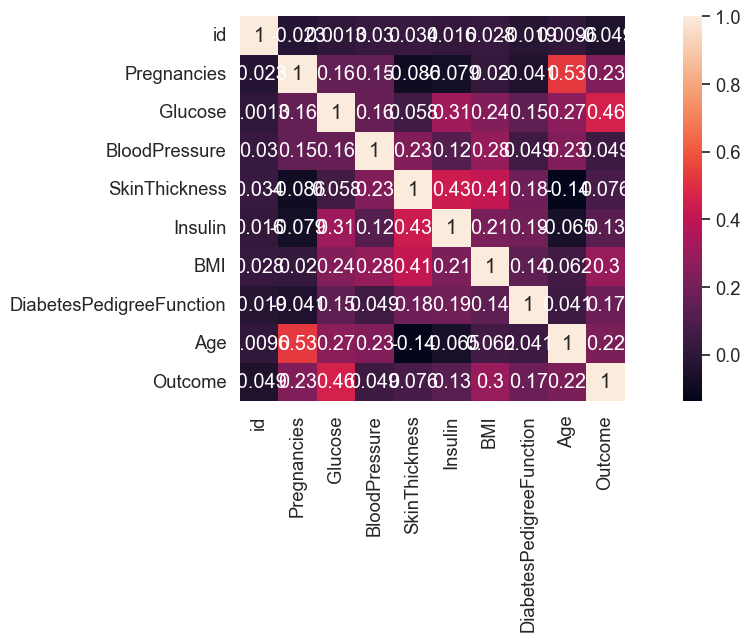

In [12]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1.2)
sns.heatmap(data=train.corr(),square=True,annot=True,cbar=True)
plt.show()

In [13]:
# sns.pairplot(data=train)

In [14]:
x_train.columns

Index(['id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

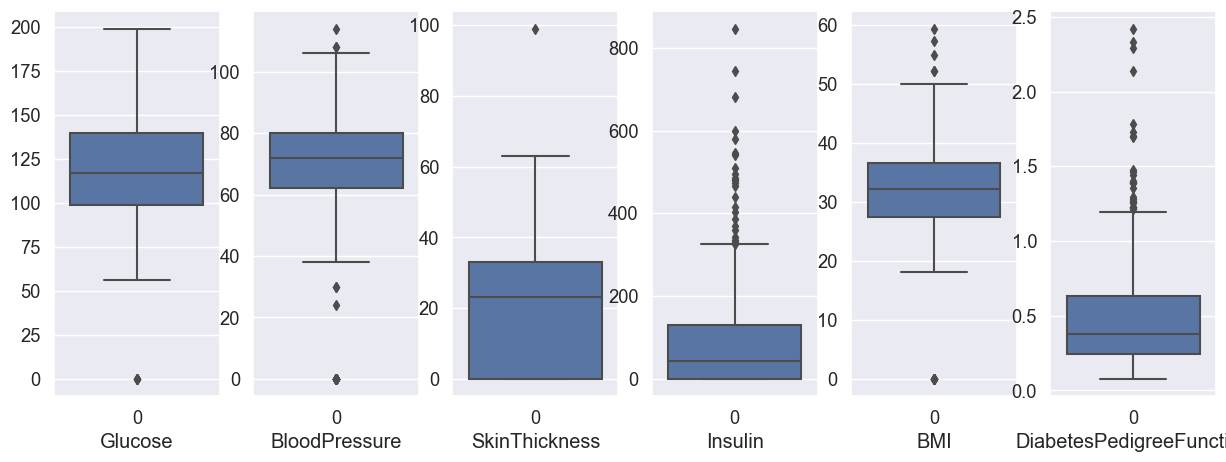

In [15]:
fig,ax = plt.subplots(1,len(x_train.iloc[:,2:-1].columns),figsize=(15,5))
for i,v in enumerate(x_train.iloc[:,2:-1].columns):
    sns.boxplot(x_train.loc[:,v],ax=ax[i])
    ax[i].set_xlabel(v)

<Axes: >

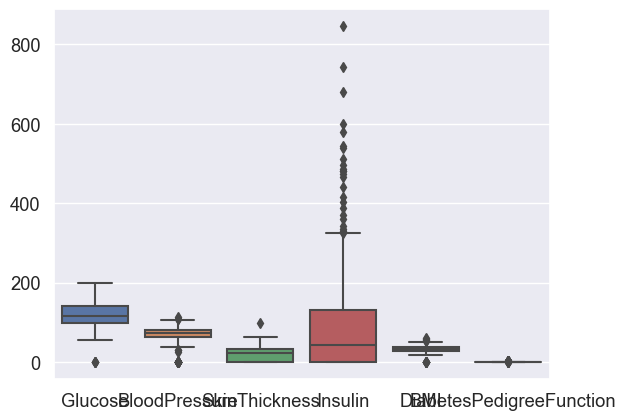

In [16]:
sns.boxplot(x_train.iloc[:,2:-1])

> 정규화 필요 + 이상치 제거 ㄱㄱ 

> 나이랑 임신횟수는 막대그래프로 해보자 

<Axes: xlabel='Pregnancies', ylabel='Outcome'>

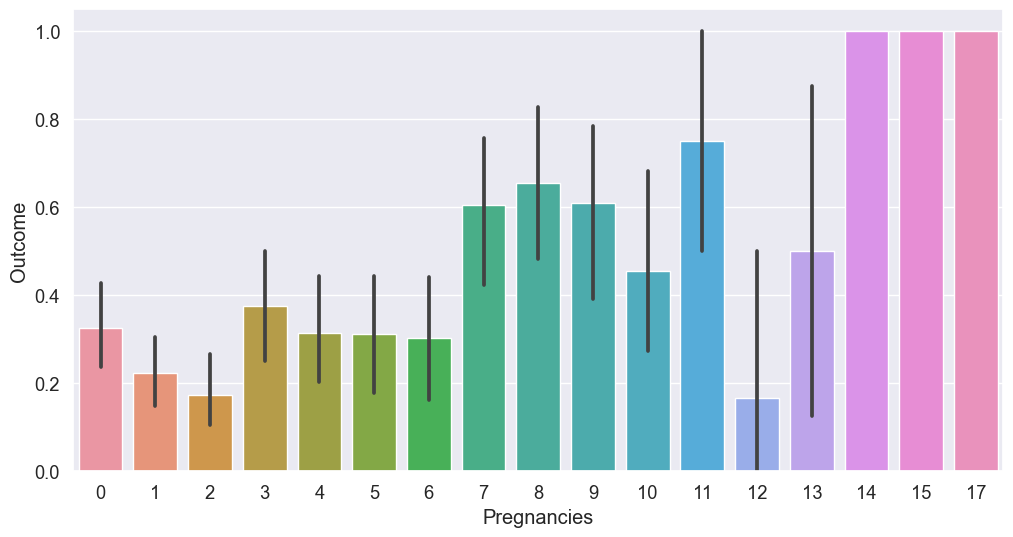

In [17]:
## 임신횟수
plt.figure(figsize=(12,6))

sns.barplot(x=train['Pregnancies'],y=train['Outcome'],data=train)

>> 임신횟수가 늘어날때마다 1일 비율이 높은 것을 확ㅇ니

<Axes: xlabel='Age', ylabel='Outcome'>

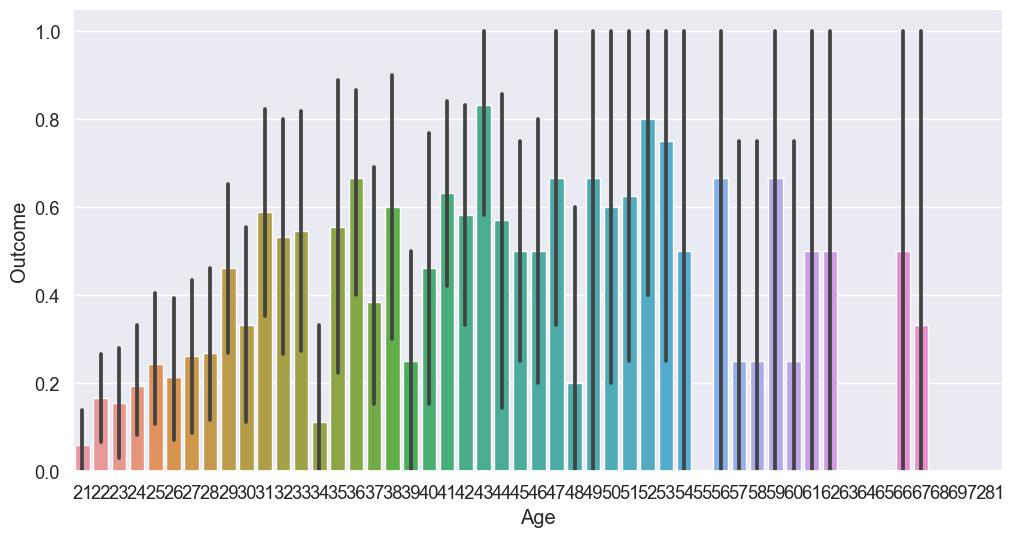

In [18]:
## 나이
plt.figure(figsize=(12,6))
sns.barplot(x=train['Age'],y=train['Outcome'],data=train)

## 데이터 전처리
### 정리
> corr 은 분류라서 안봐도 됨

> 이상치 제거 필요

> 결측치 없음

> scaling 필요

### 이상치 제거 

In [19]:
### 필요없는 열 제거
# x_train = x_train.drop('id',axis=1)
# x_train.head()

In [20]:
x_train.columns


Index(['id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [21]:
# preg_1q = x_train['Pregnancies'].quantile(0.25)
# preg_3q = x_train['Pregnancies'].quantile(0.75)
# IQR_preg = preg_3q - preg_1q

# x_train = x_train.loc[(x_train['Pregnancies']>=preg_1q - 1.5 * IQR_preg)& (x_train['Pregnancies']<=preg_1q + 1.5 * IQR_preg)]

In [22]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 147 to 116
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        614 non-null    int64  
 1   Pregnancies               614 non-null    int64  
 2   Glucose                   614 non-null    int64  
 3   BloodPressure             614 non-null    int64  
 4   SkinThickness             614 non-null    int64  
 5   Insulin                   614 non-null    int64  
 6   BMI                       614 non-null    float64
 7   DiabetesPedigreeFunction  614 non-null    float64
 8   Age                       614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 64.1 KB


In [23]:
clean_df = x_train.copy()

In [24]:
clean_df.columns

Index(['id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

## 이상치 제거 함수

In [25]:

# def outlier_data(df,columns):
#     clean_df = df.copy()
#     for col in x_train.columns :
#         col_data = clean_df[col]
#         Q1 = clean_df[col].quantile(0.25)
#         Q3 = clean_df[col].quantile(0.75)
#         IQR = Q3-Q1
#         low_outlier = Q1 - 1.5 * IQR
#         high_outlier = Q3 + 1.5 * IQR
#         print(len(clean_df))
#         clean_df = clean_df[(clean_df[col]>=low_outlier) & (clean_df[col]<=high_outlier)]
# clean_df.info()

    

In [26]:
for col in x_train.columns[1:] :
    col_data = clean_df[col]
    Q1 = clean_df[col].quantile(0.25)
    Q3 = clean_df[col].quantile(0.75)
    IQR = Q3-Q1
    low_outlier = Q1 - 1.5 * IQR
    high_outlier = Q3 + 1.5 * IQR
    print(len(clean_df))
    clean_df = clean_df[(clean_df[col]>=low_outlier) & (clean_df[col]<=high_outlier)]
clean_df.info()

614
610
605
568
567
546
538
518
<class 'pandas.core.frame.DataFrame'>
Index: 512 entries, 344 to 116
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        512 non-null    int64  
 1   Pregnancies               512 non-null    int64  
 2   Glucose                   512 non-null    int64  
 3   BloodPressure             512 non-null    int64  
 4   SkinThickness             512 non-null    int64  
 5   Insulin                   512 non-null    int64  
 6   BMI                       512 non-null    float64
 7   DiabetesPedigreeFunction  512 non-null    float64
 8   Age                       512 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 40.0 KB


In [27]:
x_train = clean_df.copy()
len(x_train)

512

In [28]:
x_train.head()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
344,344,8,95,72,0,0,36.8,0.485,57
390,390,1,100,66,29,196,32.0,0.444,42
150,150,1,136,74,50,204,37.4,0.399,24
132,132,3,170,64,37,225,34.5,0.356,30
124,124,0,113,76,0,0,33.3,0.278,23


In [29]:
# for col in x_train.columns[:] :
#     col_data = clean_df[col]
#     Q1 = clean_df[col].quantile(0.25)
#     Q3 = clean_df[col].quantile(0.75)
#     IQR = Q3-Q1
#     low_outlier = Q1 - 1.5 * IQR
#     high_outlier = Q3 + 1.5 * IQR
#     print(len(clean_df))
#     clean_df = clean_df[(clean_df[col]>=low_outlier) & (clean_df[col]<=high_outlier)]
# clean_df.info()

In [30]:
len(y_train)

614

In [31]:
y_train = y_train.loc[x_train['id'],:]
len(y_train)

512

In [32]:
x_test.columns[1:]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [33]:
## test 데이터에도 ㄱㄱ 
for col in x_test.columns[1:]:
    col_data=x_test[col]
    Q1=x_test[col].quantile(0.25)
    Q3 = x_test[col].quantile(0.75)
    IQR = Q3-Q1
    low_outlier = Q1-1.5*IQR
    high_outlier = Q3 + 1.5*IQR
    x_test = x_test[(x_test[col]>=low_outlier) & (x_test[col]<=high_outlier)]


In [34]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 438 to 174
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        127 non-null    int64  
 1   Pregnancies               127 non-null    int64  
 2   Glucose                   127 non-null    int64  
 3   BloodPressure             127 non-null    int64  
 4   SkinThickness             127 non-null    int64  
 5   Insulin                   127 non-null    int64  
 6   BMI                       127 non-null    float64
 7   DiabetesPedigreeFunction  127 non-null    float64
 8   Age                       127 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 9.9 KB


In [35]:
len(x_test)

127

In [36]:
y_test = y_test.loc[x_test['id'],:]
len(y_test)


127

In [37]:
x_train.head()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
344,344,8,95,72,0,0,36.8,0.485,57
390,390,1,100,66,29,196,32.0,0.444,42
150,150,1,136,74,50,204,37.4,0.399,24
132,132,3,170,64,37,225,34.5,0.356,30
124,124,0,113,76,0,0,33.3,0.278,23


In [38]:
x_test.head()

,id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
438,438,1,97,70,15,0,18.2,0.147,21
130,130,4,173,70,14,168,29.7,0.361,33
730,730,3,130,78,23,79,28.4,0.323,34
641,641,4,128,70,0,0,34.3,0.303,24
498,498,7,195,70,33,145,25.1,0.163,55


In [39]:
x_train=x_train.drop('id',axis=1)
x_test = x_test.drop('id',axis=1)


In [40]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
344,8,95,72,0,0,36.8,0.485,57
390,1,100,66,29,196,32.0,0.444,42
150,1,136,74,50,204,37.4,0.399,24
132,3,170,64,37,225,34.5,0.356,30
124,0,113,76,0,0,33.3,0.278,23


### 표준확 ㄱㄱ 

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test),columns=x_test.columns)

In [42]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.288076,-0.851505,-0.002893,-1.388731,-0.860846,0.815168,0.189007,2.102538
1,-0.868143,-0.680348,-0.525666,0.522464,1.474585,0.032698,0.030814,0.791652
2,-0.868143,0.551981,0.171365,1.906432,1.569909,0.912977,-0.142812,-0.781411
3,-0.252080,1.715847,-0.699924,1.049690,1.820133,0.440235,-0.308722,-0.257057
4,-1.176174,-0.235341,0.345622,-1.388731,-0.860846,0.244617,-0.609675,-0.868803


In [43]:
train_id = y_train[['id']]
test_id = y_test[['id']]
y_train.drop('id',axis=1,inplace=True)
y_test.drop('id',axis=1,inplace=True)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)


C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [45]:
y_knn_pred = knn.predict(x_test)
print('예측값',y_knn_pred[:5])

예측값 [0 1 0 0 1]


In [46]:
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test,y_knn_pred)
print(f"accuracy:{knn_acc}")

accuracy:0.7559055118110236


In [47]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(x_train,y_train)

C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [48]:
y_svc_pred = svc.predict(x_test)
print("예측값:", y_svc_pred[:5])
# 성능 평가
svc_acc = accuracy_score(y_test,y_svc_pred)
print("accuracy:%4f" % svc_acc)

예측값: [0 1 0 0 0]
accuracy:0.779528


In [49]:
from sklearn.linear_model import LogisticRegression
lrc =LogisticRegression()
lrc.fit(x_train,y_train)

# 예측
y_lrc_pred = lrc.predict(x_test)
lrc_acc=accuracy_score(y_test,y_lrc_pred)
print("정확도:%4f" % lrc_acc)

정확도:0.818898


C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=3,random_state=20)
dtc.fit(x_train,y_train)

# 예측

y_dtc_pred = dtc.predict(x_test)
print("예측값:", y_dtc_pred[:5])

# 성능평가

dtc_acc = accuracy_score(y_test, y_dtc_pred)
print("정확도:%4f" % dtc_acc)


예측값: [0 1 0 0 1]
정확도:0.724409


In [51]:
from sklearn.ensemble import VotingClassifier
hvc = VotingClassifier(estimators=[('KNN',knn),("SVM",svc),("DT",dtc)],voting= 'hard')
hvc.fit(x_train,y_train)

## 예측
y_hvc_pred = hvc.predict(x_test)
print("예측값", y_hvc_pred[:5])
# 성능평가
hvc_acc = accuracy_score(y_test,y_hvc_pred)
print("정확도:%4f" % hvc_acc)

예측값 [0 1 0 0 1]
정확도:0.763780


C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50,max_depth=3,random_state=32)
rfc.fit(x_train,y_train)

# 예측
y_rfc_pred = rfc.predict(x_test)
print("예측값:", y_rfc_pred[:5])
# 모델 성능 평가
rfc_acc = accuracy_score(y_test, y_rfc_pred)
print("정확도:%4f" % rfc_acc)

C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


예측값: [0 1 0 0 1]
정확도:0.732283


In [53]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(n_estimators=50,max_depth=3,random_state=324)
xgbc.fit(x_train,y_train)

y_xgbc_pred = xgbc.predict(x_test)
# 모델 성능 평가
xgbc_acc = accuracy_score(y_test, y_xgbc_pred)
print("정확도:", xgbc_acc)

정확도: 0.7637795275590551


### 교차검증 1 hold-out

In [54]:
# 검증용 데이터셋 분리
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.3, shuffle=True, random_state=20)
print(x_tr.shape, y_tr.shape)
print(x_val.shape, y_val.shape)

(358, 8) (358, 1)
(154, 8) (154, 1)


In [55]:
# 학습
rfc = RandomForestClassifier(max_depth=3, random_state=20)
rfc.fit(x_tr, y_tr)
# 예측
y_tr_pred = rfc.predict(x_tr)
y_val_pred = rfc.predict(x_val)
# 검증
tr_acc = accuracy_score(y_tr, y_tr_pred)
val_acc = accuracy_score(y_val, y_val_pred)
print("트레인 정확도:%4f" % tr_acc)
print("val정확도 :%4f" % val_acc)

C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


트레인 정확도:0.846369
val정확도 :0.746753


In [56]:
# 테스트 데이터 예측 및 평가
y_test_pred = rfc.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)
print("test 정확도 : %4f" % test_acc)

test 정확도 : 0.724409


### 교차검증 (2) k-fold

In [60]:
from sklearn.model_selection import KFold
kFold = KFold(n_splits=5,shuffle=True,random_state=123)

num_foid =1 
for tr_index, val_index in kFold.split(x_train):
    print("%s Fold --------------------------" % num_foid)
    print('훈련: ',len(tr_index))
    print('검증: ',len(val_index))
    num_foid +=1



1 Fold --------------------------
훈련:  409
검증:  103
2 Fold --------------------------
훈련:  409
검증:  103
3 Fold --------------------------
훈련:  410
검증:  102
4 Fold --------------------------
훈련:  410
검증:  102
5 Fold --------------------------
훈련:  410
검증:  102


In [61]:
### 랜덤 포레스트 모들로 k-fold교차검증 평가

val_scores=[]
num_foid =1 
for tr_index,val_index in kFold.split(x_train,y_train):
    x_tr,x_val = x_train.iloc[tr_index,:], x_train.iloc[val_index,:]
    y_tr,y_val = y_train.iloc[tr_index], y_train.iloc[val_index]
    ## 학습
    rfc = RandomForestClassifier(max_depth=5,random_state=31)
    rfc.fit(x_tr,y_tr)

    # 검증 
    y_val_pred = rfc.predict(x_val)
    val_acc = accuracy_score(y_val,y_val_pred)
    print("%d Fold 정확도 : %4f" % (num_foid, val_acc))
    val_scores.append(val_acc)
    num_foid+=1


C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1 Fold 정확도 : 0.805825


C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


2 Fold 정확도 : 0.796117


C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


3 Fold 정확도 : 0.745098


C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


4 Fold 정확도 : 0.784314


C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


5 Fold 정확도 : 0.764706


In [62]:
# 5개 폴드의 검증 정확도를 평균한다.
# 평균 Accuracy 계산
import numpy as np
mean_score = np.mean(val_scores)
print("평균검증 정확도 :", np.round(mean_score, 4))


평균검증 정확도 : 0.7792
